In this notebook, we will try to do text classification using different text representation techniques such as bag of n-grams and TF-IDF and word embeddings

In [1]:
import pandas as pd
df= pd.read_csv("C:/Users/Wajih/Desktop/Projects Wajih/Documentation Text Classification/df_file.csv")
print(df.head())

                                                Text  Label
0  Budget to set scene for election\n \n Gordon B...      0
1  Army chiefs in regiments decision\n \n Militar...      0
2  Howard denies split over ID cards\n \n Michael...      0
3  Observers to monitor UK election\n \n Minister...      0
4  Kilroy names election seat target\n \n Ex-chat...      0


In [2]:
df.shape

(2225, 2)

C:\Users\Wajih\AppData\Local\Temp\ipykernel_13164\2892727057.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


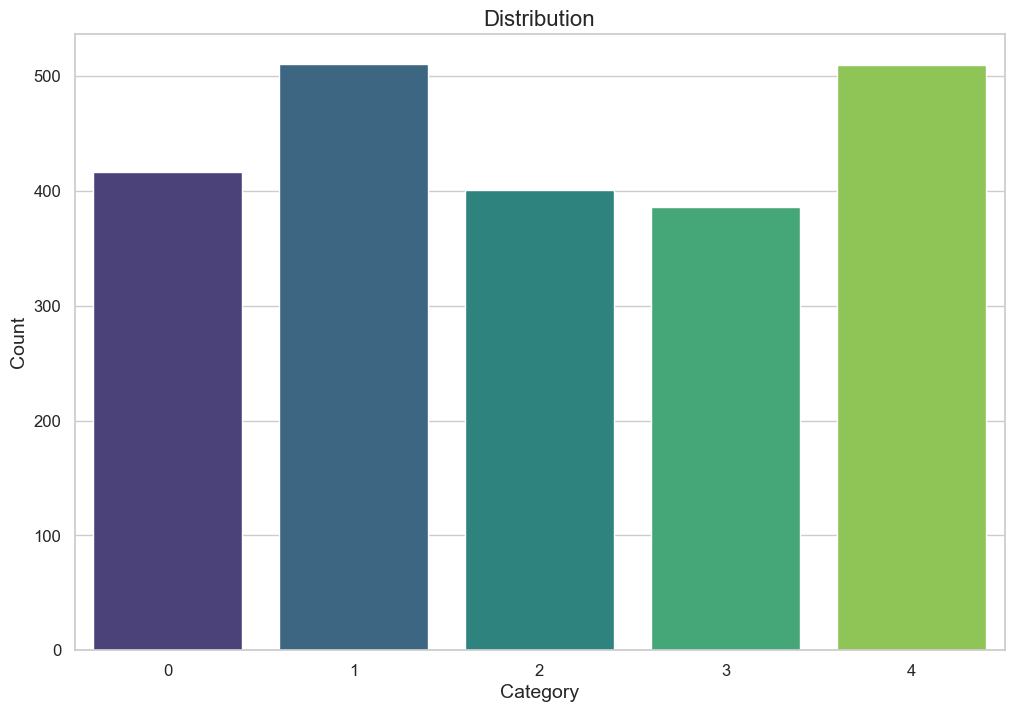

In [3]:
# Crete a bar chart showing the count of unique values for our target variable (in our case it is "Label")
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df["Label"].value_counts()

# Create the bar chart
sns.set_theme(style="whitegrid")  # Set a theme
plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Add labels and title
plt.title("Distribution", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.show()

--> There is a slight imbalance but it is not a big problem

In [15]:
# Print the number of null values in each column

print(df.isnull().sum())

Text     0
Label    0
dtype: int64


In [16]:
print(df["Text"][1])

Army chiefs in regiments decision
 
 Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.
 
 A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King's Own Scottish Bord

In [18]:
import spacy
#spacy.load("en_core_web_sm") loads the small English model for text processing.
#It returns (In nlp variable) a language processing object (pipeline), which you assign to the variable nlp to process text.
nlp= spacy.load("en_core_web_sm")

In [19]:
import re # for regular expressions
# a function for pre processing made specifically to handle the text in this dataset
def data_cleaner(text):
    
    
    
    # Step 1: Remove leading/trailing whitespaces
    text = text.strip()

    # Step 2: Replace escaped characters
    text = text.replace("\\'", "'")

    # Step 3: Normalize newlines and multiple spaces
    text = re.sub(r'\n\s*\n', '\n', text)  # Remove multiple newlines
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    
    
    return text

In [ ]:

def preprocess(text):
    # The result is a doc object, which is a container for the processed text.
    # This Doc object holds all the tokens and their annotations (like part of speech, lemma, etc.) for the text using the nlp object that we have created.
    doc = nlp(text)
    filtered_tokens = []
    # this loop iterates over each token in the doc object. A token is essentially a word or punctuation mark in the input text.
    for token in doc:
        # remove stop words and punctuations from each value
        if token.is_stop or token.is_punct:
            continue
        #The .lemma_ attribute of a token is the lemma of the word, which is its base or dictionary form. 
        filtered_tokens.append(token.lemma_)
    # This results in a cleaned-up version of the original text, which has removed stopwords, punctuation, and reduced words to their base forms.    
    return " ".join(filtered_tokens)



In [21]:

df['Text'] = df["Text"].apply(data_cleaner)
df['Text'] = df["Text"].apply(preprocess)

In [23]:
print(df["Text"][1])

Army chief regiment decision military chief expect meet final decision future Scotland Army regiment committee Army Board senior defence figure discuss plan restructuring regiment Monday proposal include cut Scotland single battalion regiment merge super regiment plan face stiff opposition campaigner politician alike committee decision ratify Defence Secretary Geoff Hoon Prime Minister Tony Blair expect public week minister announce reorganisation Army draw question mark future Black Watch king Scottish Borderers Royal Scots Royal Highland Fusiliers Argyll Sutherland Highlanders October Council Scottish Colonels propose merger Royal Scots King scottish Borderers single battalion vision new super regiment proposal merge amalgamate regiment super regiment spark political outcry Labour backbencher opposition politician oppose plan feel timing insensitive Black Watch frontline Iraq suffer casualty Save Scottish Regiments campaigner angered threaten stand Labour general election speak ahead

In [24]:
# Splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.Text,df.Label,test_size= 0.2)

In [26]:
print(X_train.shape)

(1780,)


In [28]:
print(X_train)

877     Moya emotional Davis Cup win Carlos Moya descr...
1201    gadget market grow 2005 explosion consumer tec...
793     Wada appeal rule World Anti doping Agency Wada...
815     El Guerrouj target cross country double olympi...
530     Jones doping probe begin investigation doping ...
                              ...                        
1258    UK broadband get speed injection Broadband rap...
1965    India call fair trade rule India attend G7 mee...
19      Goldsmith leant attorney general deny leant Do...
1400    Oscar nominee lack pull power year clutch Osca...
1907    Fannie Mae restate book mortgage company Fanni...
Name: Text, Length: 1780, dtype: object


In [30]:
print(X_train.values)
print(type(X_train.values))

['Moya emotional Davis Cup win Carlos Moya describe Spain Davis Cup victory highlight career beat Andy Roddick end USA challenge Seville Moya miss Spain 2000 victory injury beat Roddick 6 2 7 6 7 1 7 6 7 5 host unassailable 3 1 lead wake night dream day say Moya energy focus today live today think live Spain Davis Cup title come year ago Valencia beat Australia Moya nickname Charly admit Davis Cup dream bit nervous outset people say obsess think well way help reach goal obsess incredible win point spanish captain Jordi Arrese say Charly play great game opportunity let lose time Roddick day beat wait year position Spain victory remarkable performance Rafael Nadal beat Roddick opening single aged 18 year 185 day Mallorcan young player win Davis Cup great way finish year say Nadal coach Patrick McEnroe want Roddick rest team play tennis clay hone skill surface think help guy slow hard court learn mix thing little bit play little bit smart tactically well obviously unrealistic go start pla

In [27]:
print(X_test.shape)

(445,)


USING BAG OF WORDS: 

In [ ]:
# CountVectorizer is used to transform a collection of text documents into a matrix of token counts.
# Each row of the matrix corresponds to a document, and each column corresponds to a unique word (or n-gram) from the entire corpus of text
from sklearn.feature_extraction.text import CountVectorizer
# This initializes an instance of the CountVectorizer class
# The ngram_range=(1,1) means only single words (1-grams) will be considered --> Bag of Words (BOW)
v = CountVectorizer(ngram_range=(1,1))
#### By default, CountVectorizer also removes any stopwords and performs other preprocessing steps (like lowercasing the text)
# .values because fit_transform expect an array

# Fit the CountVectorizer model to the data.
# During this step, the vectorizer learns the vocabulary of the input documents (i.e., it identifies all the unique words in the training set).
# Transform the input data (X_train.values) into a document-term matrix (DTM).
# The matrix contains the frequency count of each word (or unigram) for each document.
X_train_cv = v.fit_transform(X_train.values)
#fit_transform() is for training data (when you first "learn" and then convert it).
#transform() is for new test data (when you apply the "learned vocabulary" to convert it).

In [45]:
# We will try to use the naive bayes algorithm for classification
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv,y_train)

MultinomialNB()

In [46]:
X_test_cv = v.transform(X_test)
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        83
           1       1.00      1.00      1.00        93
           2       0.96      0.99      0.97        91
           3       0.99      0.96      0.97        80
           4       0.99      0.95      0.97        98

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.97       445
weighted avg       0.98      0.98      0.98       445



-our model seems to work very well:

*a small reminder for the above measures:
-Precision: The proportion of true positive predictions among all positive predictions (how many selected items are relevant).
-Recall: The proportion of true positive predictions among all actual positive instances (how many relevant items are selected).
-F1-Score: The harmonic mean of precision and recall, balancing both to provide a single metric (a balance between precision and recall).
-Support: The number of actual occurrences of each class in the dataset (how many instances there are in each class).


USING BAG OF N-GRAMS (Bi-grams)

Wee used the bag of words which is a special case of the bag of N-Grams. We will try to use the bi-grams and to see if the model is better (Dividing the text not only in words but also in pair of words)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=(1,2)) # modifiying ngram_range to 2 in order to capture the bag of bi-grams
# .values because fit_transform expect an array
X_train_cv = v.fit_transform(X_train.values)


In [48]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv,y_train)

MultinomialNB()

In [49]:
X_test_cv = v.transform(X_test)
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        83
           1       1.00      1.00      1.00        93
           2       0.96      0.99      0.97        91
           3       0.99      0.94      0.96        80
           4       0.99      0.95      0.97        98

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



BOW (bag of words: n =(1,1)) is performing slightly better that Bag of n-words (for example n=(1,2))

We will try to use TF-IDF


1-TF-IDF: 
-TF-IDF is used to evaluate how important a word is in a document relative to the entire corpus.
-TF measures how often a word appears in a document.
-IDF adjusts for how common or rare a word is across all documents.
-TF-IDF combines both to give a score that helps identify important words in a document for tasks like text classification, clustering, etc.



2- Pipeline with two steps:

-TF-IDF Vectorization (TfidfVectorizer): Converts text documents into numeric features (TF-IDF values).
-Naive Bayes Classifier (MultinomialNB): Applies the Naive Bayes algorithm to the transformed text features to make predictions.
-Pipeline ensures that the steps are executed in order, and everything is done automatically when fitting the model and making predictions.

In [50]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ("NB",MultinomialNB())
])

clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95        83
           1       0.97      1.00      0.98        93
           2       0.99      0.96      0.97        91
           3       0.99      0.94      0.96        80
           4       0.96      0.99      0.97        98

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



Good results for TF-IDF but BOW is providing the best results (Using the same model of Naive Bayes)

We will try word embedding: 
-Word embedding is a technique used to represent words in a dense, continuous vector space, where words with similar meanings are represented by vectors that are close to each other. Unlike traditional one-hot encoding, word embeddings capture semantic relationships between words, such as synonyms and analogies, by mapping words to fixed-size vectors of real numbers. Popular algorithms for generating word embeddings include Word2Vec, GloVe, and fastText.

"en_core_web_sm" : The word vectors in "en_core_web_lg" are primarily based on Word2Vec and GloVe embeddings. Word2Vec learns word embeddings by predicting context words (surrounding words) given a target word, while GloVe uses a matrix factorization approach based on word co-occurrence statistics in large corpora.




In [ ]:
import spacy
# the large english model is imported as it contains word vectors (word embeddings)
#  High-quality vector representations for words, capturing semantic information.
nlp = spacy.load("en_core_web_lg")

Creating the column with word embeddings,The .vector attribute provides a single vector for an entire document or text.
This vector is intended to capture the overall meaning of the document, considering the words that appear in it. (a 300-dimensional vector)
This vector is the average of the word vectors of all the words in the document

Example Below:

In [55]:
import spacy

# Process some text
doc = nlp("I love programming")

# Get the document vector (average of word vectors)
print("Length of the vector",len(doc.vector))
print(doc.vector)

Length of the vector 300
[ 7.29499981e-02  3.25918674e-01 -4.07699943e-02 -1.18749999e-01
  4.43813354e-02  1.90203324e-01  3.14299971e-01 -3.19283336e-01
  1.92939997e-01  1.63876665e+00 -4.45983678e-01 -7.32860044e-02
  2.66966671e-01 -2.05666628e-02  2.38266680e-02 -4.80399514e-03
 -2.16549680e-01  1.44784343e+00 -1.02103353e-01  1.18610002e-01
  2.66653329e-01 -6.88636750e-02 -1.80966649e-02 -2.71283295e-02
  1.60633326e-02  1.61756631e-02 -1.17347993e-01 -1.73349991e-01
  2.60224015e-01 -3.55066848e-03 -2.58381665e-01 -1.62210003e-01
 -2.32941985e-01 -2.94933319e-02 -1.12486660e-01  1.09903365e-02
 -3.59696634e-02  1.67199969e-02 -3.37666661e-01  9.78307053e-02
 -4.36390005e-02 -9.52333435e-02 -1.38969989e-02  3.24216664e-01
 -1.84083339e-02  3.94846678e-01 -1.72433361e-01  2.46566653e-01
  2.27150008e-01 -1.41810328e-02 -1.66502669e-01 -1.46298006e-01
 -4.26574983e-02 -6.74359947e-02  1.11376666e-01  4.39303368e-02
 -2.08033323e-01 -1.31946668e-01 -6.75000250e-03 -1.10369332e-01


For other smaller english model, we have embedding vectors with smaller dimension (96-dimensional vector)

In [56]:
import spacy
nlp = spacy.load("en_core_web_sm")
# Process some text
doc = nlp("I love programming")

# Get the document vector (average of word vectors)
print("Length of the vector",len(doc.vector))
print(doc.vector)

Length of the vector 96
[-0.9840974   0.05682392 -0.05831423  0.09982105  0.08085299  0.00709766
  0.56997865  0.17081945  0.9136718  -0.23357     0.23213662 -0.02273707
 -0.20573123 -0.19035475 -0.08310296  0.7744909  -0.37247118  0.43692794
 -0.5398376  -0.61555576 -0.32093883  1.0167942  -0.69309896 -0.15306844
 -0.05986856  0.5185364  -0.20689951  0.7287614  -0.67431974 -0.53027755
  0.09537614 -0.07422096  0.14887346  0.67187333 -1.0095683  -0.52091855
 -0.3458784  -0.6290856   0.32294098  0.7211538   0.23303549  0.5353721
 -0.02051728  0.18625355  0.16271596 -0.04627235 -0.4278659   0.31351522
  0.49388894 -0.08658119  0.16050202 -0.8289668   0.04458065 -0.74402386
  0.3103873  -1.046563    0.9801151  -0.15293767 -0.15395297 -0.46250805
 -0.06755435  0.08445827  0.6054252  -0.23858525 -0.31859812 -0.02231249
 -0.3719206  -0.6874067  -0.0872013   0.6121544  -0.52361286  0.1280561
  1.0421213  -0.2552677  -0.79404545  0.6899759  -0.280534   -0.7043403
 -0.14771138 -0.3568233  -0.33

We go back to our dataset

In [58]:

nlp = spacy.load("en_core_web_lg")
df['vector']=df['Text'].apply(lambda x : nlp(x).vector)


In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    df.vector.values,
    df.Label,
    test_size= 0.2,
    random_state=2022
    
    )

In [60]:
print(X_train.shape)
print(X_test.shape)

(1780,)
(445,)


In [61]:
X_train

array([array([-1.57947332e-01,  1.32661402e-01,  5.63072525e-02,  1.86268166e-02,
               9.04270262e-02, -8.10761750e-02,  4.12331522e-03, -5.13736680e-02,
               3.54599133e-02,  1.78416359e+00, -3.39909554e-01, -3.07418127e-02,
               3.29873562e-02, -8.63942057e-02, -9.87968221e-02,  3.21891345e-03,
              -7.39310607e-02,  6.88180506e-01, -6.08006977e-02,  8.56475998e-03,
               1.59817934e-01, -7.27480948e-02,  6.31359741e-02, -1.21478230e-01,
               6.26364723e-02, -1.61364325e-03, -2.00760916e-01,  7.70386234e-02,
               1.10808127e-01,  7.26642460e-02, -7.36524910e-02,  2.09743544e-01,
               8.94116312e-02,  2.12997179e-02,  4.81699221e-02,  6.90540895e-02,
              -3.38301770e-02, -1.14586875e-02, -1.79299951e-01, -2.40891110e-02,
               5.52713200e-02,  5.81357777e-02, -1.61667671e-02,  7.14992732e-02,
               6.10888526e-02,  3.27249467e-02,  5.08306585e-02,  1.52689461e-02,
               6

In [62]:
import numpy as np
#Machine learning models in libraries like scikit-learn expect input data to be in the form of a 2D array where:
# Using np.stack to convert the list of vectors into a 2D array:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)
print(X_train_2d)

[[-0.15794733  0.1326614   0.05630725 ... -0.11116975  0.04089983
   0.03742805]
 [-0.00773718  0.1810277   0.1494989  ... -0.14761281  0.03943951
  -0.05301436]
 [-0.04533282  0.12353989  0.01864688 ... -0.09478562 -0.03388072
  -0.04727682]
 ...
 [-0.10878423  0.1291075   0.07004925 ... -0.07330326 -0.02592396
  -0.02465212]
 [-0.12888248  0.20773578  0.02413941 ...  0.02811385 -0.02058205
   0.2284999 ]
 [-0.05175644  0.1950259   0.06963528 ... -0.23240449  0.12340229
   0.01708203]]


In [63]:
from sklearn.naive_bayes import MultinomialNB
# we have to scale the variables to avoid negative values in the vectors
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)
clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)


MultinomialNB()

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test,clf.predict(scaled_test_embed)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        84
           1       0.97      0.98      0.97        95
           2       0.94      0.89      0.91        84
           3       0.97      0.92      0.95        79
           4       0.95      0.89      0.92       103

    accuracy                           0.93       445
   macro avg       0.93      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445

